In [ ]:
pip install pingouin
pip install bioinfokit

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import seaborn as sns
from IPython.display import display
import pingouin as pg
from scipy import stats
from bioinfokit.analys import stat, get_data

In [112]:
df = pd.read_csv('Wellbeing_and_lifestyle_data_Kaggle.csv')
df

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,6,4,5,0,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,5,2,5,5,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,2,2,4,5,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,3,5,5,0,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,5,0,5,0,7,0,0,2,8,1,5,51 or more,Female,663.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3/14/21 5:42,3,3,0,4,0,10,0,4,2,8,2,10,7,7,0,1,1,5,2,5,51 or more,Female,644.5
15968,3/14/21 6:30,3,3,6,8,7,4,6,3,1,7,5,6,5,6,0,0,2,10,5,8,21 to 35,Female,714.9
15969,3/14/21 8:35,4,3,0,10,10,8,6,5,1,7,3,5,2,7,0,1,2,10,1,10,21 to 35,Male,716.6
15970,3/14/21 8:43,1,1,10,8,2,7,3,2,1,6,10,1,5,8,7,2,2,1,6,8,21 to 35,Female,682.0


In [113]:
df = df[['DAILY_STRESS', 'PLACES_VISITED', 'SOCIAL_NETWORK', 'SLEEP_HOURS', 'ACHIEVEMENT', 'GENDER']]

cleanup_nums = {"GENDER": {"Female": 0, "Male": 1}}
df = df.replace(cleanup_nums)


df = df.drop(10005, axis=0, errors='ignore').apply(pd.to_numeric)
pd.set_option('display.max_columns', None)
df

,DAILY_STRESS,PLACES_VISITED,SOCIAL_NETWORK,SLEEP_HOURS,ACHIEVEMENT,GENDER
0,2,2,5,7,2,0
1,3,4,10,8,5,0
2,3,3,10,8,3,0
3,3,10,7,5,2,0
4,1,3,4,7,2,0
...,...,...,...,...,...,...
15967,3,0,10,7,0,0
15968,3,6,4,6,6,0
15969,3,0,8,7,6,1
15970,1,10,7,8,3,0


# One-Way ANOVA Test Assumption Check

In [115]:
df['DAILY_STRESS'] = df['DAILY_STRESS'].astype('category')
df['GENDER'] = df['GENDER'].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15971 entries, 0 to 15971
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   DAILY_STRESS    15971 non-null  category
 1   PLACES_VISITED  15971 non-null  int64   
 2   SOCIAL_NETWORK  15971 non-null  int64   
 3   SLEEP_HOURS     15971 non-null  int64   
 4   ACHIEVEMENT     15971 non-null  int64   
 5   GENDER          15971 non-null  category
dtypes: category(2), int64(4)
memory usage: 655.4 KB


In [116]:
df.groupby('DAILY_STRESS').size()

DAILY_STRESS
0     676
1    2478
2    3407
3    4398
4    2960
5    2052
dtype: int64

In [117]:
df.groupby('DAILY_STRESS').describe()


PLACES_VISITED                                                 \
                      count      mean       std  min  25%  50%   75%   max   
DAILY_STRESS                                                                 
0                     676.0  5.758876  3.519616  0.0  3.0  5.0  10.0  10.0   
1                    2478.0  5.726796  3.293970  0.0  3.0  5.0  10.0  10.0   
2                    3407.0  5.522747  3.239600  0.0  3.0  5.0   9.0  10.0   
3                    4398.0  5.363574  3.210514  0.0  3.0  5.0   8.0  10.0   
4                    2960.0  4.889189  3.271724  0.0  2.0  4.0   8.0  10.0   
5                    2052.0  4.200292  3.384558  0.0  1.0  3.0   7.0  10.0   

             SOCIAL_NETWORK                                                 \
                      count      mean       std  min  25%  50%   75%   max   
DAILY_STRESS                                                                 
0                     676.0  6.177515  3.257060  0.0  3.0  6.0  10.0  10.0   
1                    2478.0  6.219532  3.045117  0.0  4.0  6.0  10.0  10.0   
2                    3407.0  6.508659  3.012379  0.0  4.0  6.0  10.0  10.0   
3                    4398.0  6.640064  2.982826  0.0  4.0  7.0  10.0  10.0   
4                    2960.0  6.575338  3.110840  0.0  4.0  7.0  10.0  10.0   
5                    2052.0  6.319688  3.343950  0.0  3.0  6.0  10.0  10.0   

             SLEEP_HOURS                                                \
                   count      mean       std  min  25%  50%  75%   max   
DAILY_STRESS                                                             
0                  676.0  7.461538  1.369509  1.0  7.0  8.0  8.0  10.0   
1                 2478.0  7.267151  1.120720  2.0  7.0  7.0  8.0  10.0   
2                 3407.0  7.158204  1.101396  1.0  7.0  7.0  8.0  10.0   
3                 4398.0  7.017053  1.117980  1.0  6.0  7.0  8.0  10.0   
4                 2960.0  6.882770  1.191147  1.0  6.0  7.0  8.0  10.0   
5                 2052.0  6.729532  1.429113  1.0  6.0  7.0  8.0  10.0   

             ACHIEVEMENT                                                
                   count      mean       std  min  25%  50%  75%   max  
DAILY_STRESS                                                            
0                  676.0  4.418639  3.163337  0.0  2.0  4.0  6.0  10.0  
1                 2478.0  4.284100  2.772493  0.0  2.0  4.0  6.0  10.0  
2                 3407.0  4.250954  2.709048  0.0  2.0  4.0  6.0  10.0  
3                 4398.0  4.087540  2.671427  0.0  2.0  4.0  6.0  10.0  
4                 2960.0  3.708446  2.672465  0.0  2.0  3.0  5.0  10.0  
5                 2052.0  3.340643  2.817277  0.0  1.0  3.0  5.0  10.0

#### Histogram for All Numeric Independent Variables

Text(0.5, 0.98, 'Histogram Plots for All Numeric Variables')

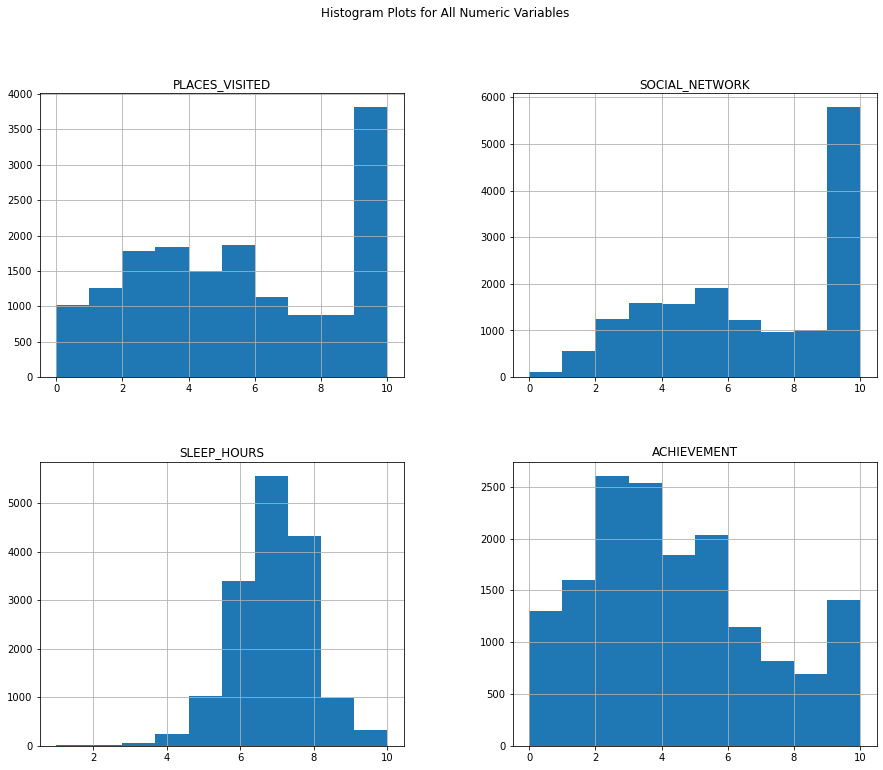

In [118]:
df.iloc[:,1:].hist(layout=(2,2), figsize=(15,12), grid=True)
plt.suptitle("Histogram Plots for All Numeric Variables")

#### Histogram for All Independent Variables For Grouped Daily Stress Level

DAILY_STRESS
0    [[AxesSubplot(0.125,0.779333;0.158163x0.100667...
1    [[AxesSubplot(0.125,0.779333;0.158163x0.100667...
2    [[AxesSubplot(0.125,0.779333;0.158163x0.100667...
3    [[AxesSubplot(0.125,0.779333;0.158163x0.100667...
4    [[AxesSubplot(0.125,0.779333;0.158163x0.100667...
5    [[AxesSubplot(0.125,0.779333;0.158163x0.100667...
dtype: object

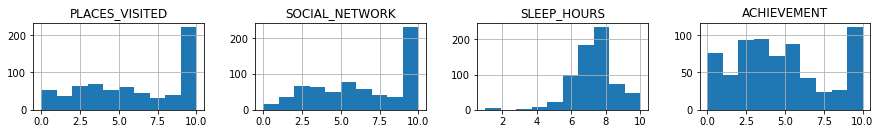

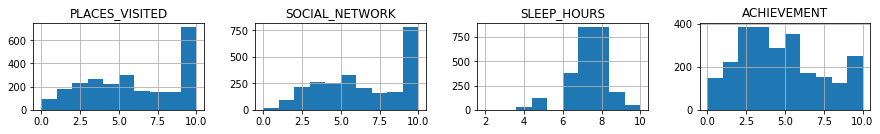

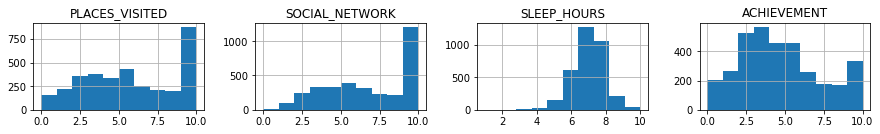

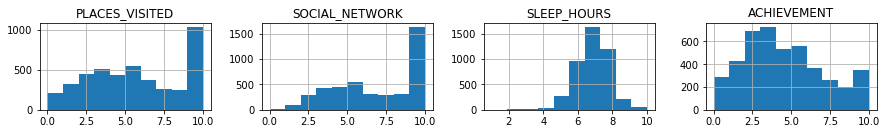

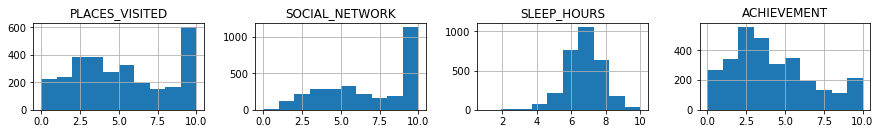

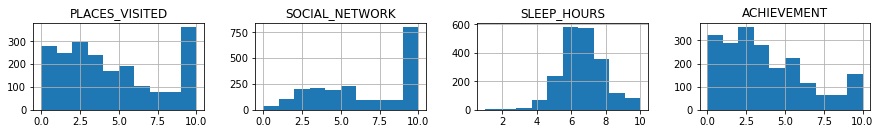

In [119]:

df.groupby('DAILY_STRESS').hist(layout=(6,4), figsize=(15,12), grid=True)
 

#### Outliers Check: Boxplot for All Numeric Independent Variables

Text(0.5, 1.0, 'Boxplot')

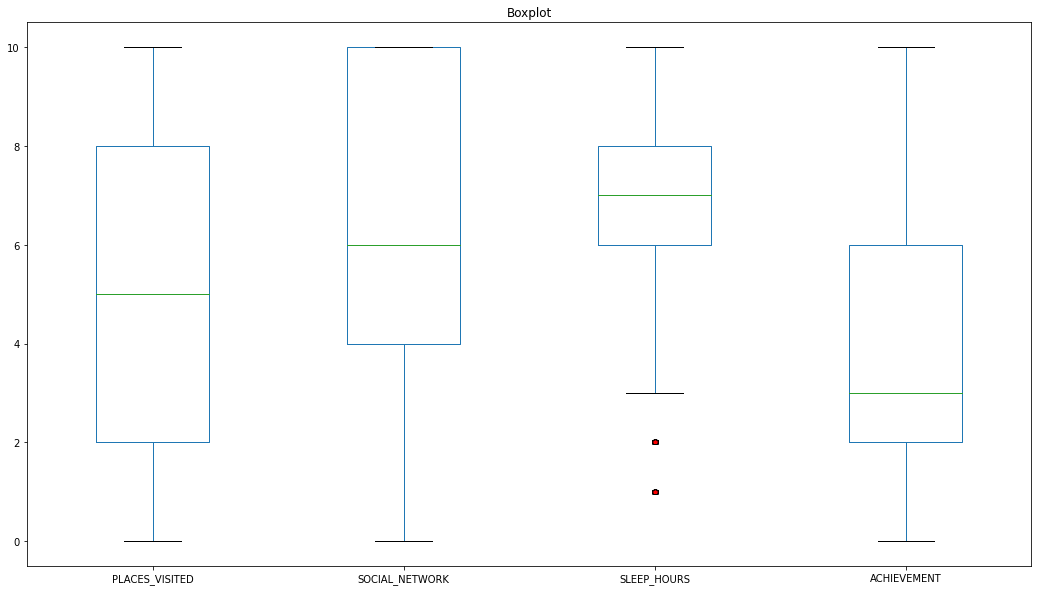

In [120]:
bit = dict(markerfacecolor = 'r', marker='p')
boxplot = df.boxplot(figsize=(18,10), grid=False, flierprops=bit)
plt.title('Boxplot')

#### Outliers Check: Boxplot for All Numeric Independent Variables For Grouped Daily Stress Level

Text(0.5, 1.0, 'Boxplot')

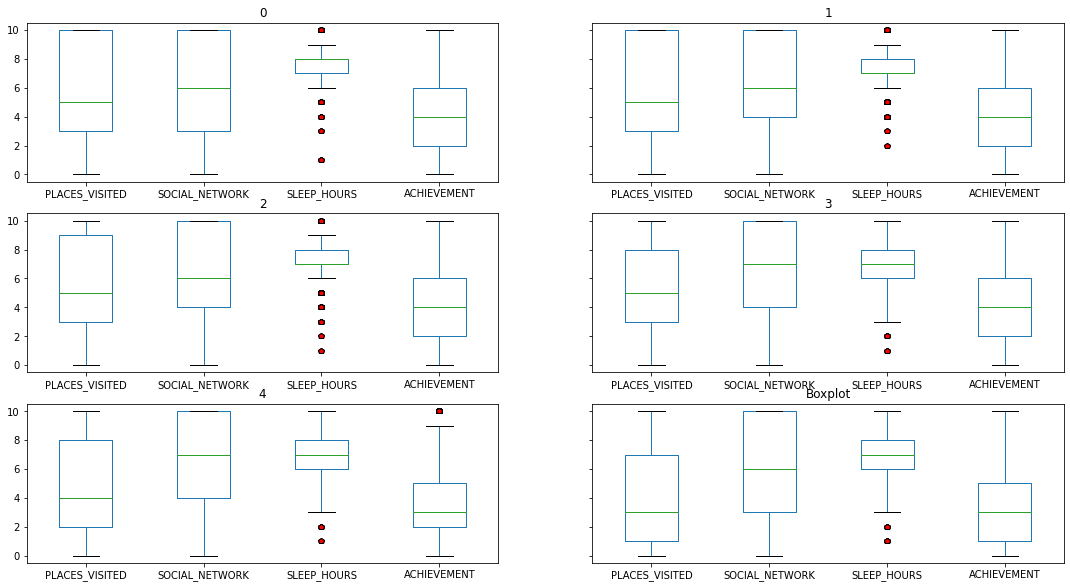

In [237]:
bit = dict(markerfacecolor = 'r', marker='p')
boxplot = df.groupby('DAILY_STRESS').boxplot(figsize=(18,10), grid=False, flierprops=bit)
plt.title('Boxplot')

### Normality Check

In [121]:
alpha = 0.05
for j in range(6):
    print("Daily stress level:", j)
    for i in df.columns:
        print("Column:", i)
        k2, pvalue = stats.normaltest(df.groupby('DAILY_STRESS').get_group(j)[[i]])
        print(k2, pvalue)
        if b < alpha:
            print("The null hypothesis can be rejcted")
        else:
            print("The null hypothesis cannot be rejected")
    print()
    

Daily stress level: 0
Column: DAILY_STRESS
[1903.68193565] [0.]
The null hypothesis can be rejcted
Column: PLACES_VISITED
[10423.73325221] [0.]
The null hypothesis can be rejcted
Column: SOCIAL_NETWORK
[3757.07793771] [0.]
The null hypothesis can be rejcted
Column: SLEEP_HOURS
[98.47871335] [4.12685399e-22]
The null hypothesis can be rejcted
Column: ACHIEVEMENT
[87.50853158] [9.9486421e-20]
The null hypothesis can be rejcted
Column: GENDER
[2748.58342138] [0.]
The null hypothesis can be rejcted

Daily stress level: 1
Column: DAILY_STRESS
[6368.14444101] [0.]
The null hypothesis can be rejcted
Column: PLACES_VISITED
[22350.92206207] [0.]
The null hypothesis can be rejcted
Column: SOCIAL_NETWORK
[34197.41704705] [0.]
The null hypothesis can be rejcted
Column: SLEEP_HOURS
[84.04202014] [5.62998455e-19]
The null hypothesis can be rejcted
Column: ACHIEVEMENT
[159.82195408] [1.97289343e-35]
The null hypothesis can be rejcted
Column: GENDER
[8840.60061529] [0.]
The null hypothesis can be rejc

In [122]:
alpha = 0.05
for j in range(6):
    print("Daily stress level:", j)
    for i in df.columns:
        print("Column:", i)
        s, pvalue = stats.shapiro(df.groupby('DAILY_STRESS').get_group(j)[[i]])
        print("statistics", s, "p-value", pvalue)
        if b < alpha:
            print("The null hypothesis can be rejcted")
        else:
            print("The null hypothesis cannot be rejected")
    print()
    

Daily stress level: 0
Column: DAILY_STRESS
statistics 1.0 p-value 1.0
The null hypothesis can be rejcted
Column: PLACES_VISITED
statistics 0.8822835087776184 p-value 3.1130016420057084e-22
The null hypothesis can be rejcted
Column: SOCIAL_NETWORK
statistics 0.8830456137657166 p-value 3.6304863178950227e-22
The null hypothesis can be rejcted
Column: SLEEP_HOURS
statistics 0.9113667607307434 p-value 2.0458639995698134e-19
The null hypothesis can be rejcted
Column: ACHIEVEMENT
statistics 0.9137169718742371 p-value 3.6904906013358267e-19
The null hypothesis can be rejcted
Column: GENDER
statistics 0.632423996925354 p-value 1.314485221862966e-35
The null hypothesis can be rejcted

Daily stress level: 1
Column: DAILY_STRESS
statistics 1.0 p-value 1.0
The null hypothesis can be rejcted
Column: PLACES_VISITED
statistics 0.901182234287262 p-value 2.573163115812872e-37
The null hypothesis can be rejcted
Column: SOCIAL_NETWORK
statistics 0.8927730321884155 p-value 1.7307431727681958e-38
The null 

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  >>> ax.axvline(maxlog, color='r')


#### Multivariate Normality Check

In [240]:
pg.multivariate_normality(df, alpha=.05)
# HZResults(hz=0.5956866563391165, pval=0.6461804077893423, normal=True)

HZResults(hz=8301.349596169708, pval=0.0, normal=False)

## Independent Variable 1: Places Visited

H0: μ0 = μ1 = μ2 = … = μ5, the mean places visited is the same across all survey respondents with stress level ranging from 0 to 5

H1: at least one population mean is different from the others

In [5]:
variable1_G0 = df[['DAILY_STRESS', 'PLACES_VISITED']].loc[(df['DAILY_STRESS']==0)]
variable1_G1 = df[['DAILY_STRESS', 'PLACES_VISITED']].loc[(df['DAILY_STRESS']==1)]
variable1_G2 = df[['DAILY_STRESS', 'PLACES_VISITED']].loc[(df['DAILY_STRESS']==2)]
variable1_G3 = df[['DAILY_STRESS', 'PLACES_VISITED']].loc[(df['DAILY_STRESS']==3)]
variable1_G4 = df[['DAILY_STRESS', 'PLACES_VISITED']].loc[(df['DAILY_STRESS']==4)]
variable1_G5 = df[['DAILY_STRESS', 'PLACES_VISITED']].loc[(df['DAILY_STRESS']==5)]

In [6]:
stat1, p1 = f_oneway(variable1_G0['PLACES_VISITED'],
                     variable1_G1['PLACES_VISITED'],
                     variable1_G2['PLACES_VISITED'],
                     variable1_G3['PLACES_VISITED'],
                     variable1_G4['PLACES_VISITED'],
                     variable1_G5['PLACES_VISITED'])

In [7]:
print("p-values:", p1)
print("ANOVA:", stat1)

if p1 < 0.05:
    print("We reject the null hypothesis")
else:
    print("We do not reject the null hypothesis")

p-values: 2.5014735138376546e-71
ANOVA: 68.72046510457366
We reject the null hypothesis


## Independent Variable 2: Social Network

H0: μ0 = μ1 = μ2 = … = μ5, the mean number of people interacted per day is the same across all survey respondents with stress level ranging from 0 to 5

H1: at least one population mean is different from the others

In [8]:
variable2_G0 = df[['DAILY_STRESS', 'SOCIAL_NETWORK']].loc[(df['DAILY_STRESS']==0)]
variable2_G1 = df[['DAILY_STRESS', 'SOCIAL_NETWORK']].loc[(df['DAILY_STRESS']==1)]
variable2_G2 = df[['DAILY_STRESS', 'SOCIAL_NETWORK']].loc[(df['DAILY_STRESS']==2)]
variable2_G3 = df[['DAILY_STRESS', 'SOCIAL_NETWORK']].loc[(df['DAILY_STRESS']==3)]
variable2_G4 = df[['DAILY_STRESS', 'SOCIAL_NETWORK']].loc[(df['DAILY_STRESS']==4)]
variable2_G5 = df[['DAILY_STRESS', 'SOCIAL_NETWORK']].loc[(df['DAILY_STRESS']==5)]

In [9]:
stat2, p2 = f_oneway(variable2_G0['SOCIAL_NETWORK'],
                   variable2_G1['SOCIAL_NETWORK'],
                   variable2_G2['SOCIAL_NETWORK'],
                   variable2_G3['SOCIAL_NETWORK'],
                   variable2_G4['SOCIAL_NETWORK'],
                   variable2_G5['SOCIAL_NETWORK'])

In [10]:
print("p-values:", p2)
print("ANOVA:", stat2)

if p2 < 0.05:
    print("We reject the null hypothesis")
else:
    print("We do not reject the null hypothesis")

p-values: 1.7410140092174364e-08
ANOVA: 8.9337277247156
We reject the null hypothesis


## Independent Variable 3: Sleep Hours

H0: μ0 = μ1 = μ2 = … = μ5, the mean number of hours slept per night is the same across all survey respondents with stress level ranging from 0 to 5

H1: at least one population mean is different from the others

In [11]:
variable3_G0 = df[['DAILY_STRESS', 'SLEEP_HOURS']].loc[(df['DAILY_STRESS']==0)]
variable3_G1 = df[['DAILY_STRESS', 'SLEEP_HOURS']].loc[(df['DAILY_STRESS']==1)]
variable3_G2 = df[['DAILY_STRESS', 'SLEEP_HOURS']].loc[(df['DAILY_STRESS']==2)]
variable3_G3 = df[['DAILY_STRESS', 'SLEEP_HOURS']].loc[(df['DAILY_STRESS']==3)]
variable3_G4 = df[['DAILY_STRESS', 'SLEEP_HOURS']].loc[(df['DAILY_STRESS']==4)]
variable3_G5 = df[['DAILY_STRESS', 'SLEEP_HOURS']].loc[(df['DAILY_STRESS']==5)]

In [12]:
stat3, p3 = f_oneway(variable3_G0['SLEEP_HOURS'],
                     variable3_G1['SLEEP_HOURS'],
                     variable3_G2['SLEEP_HOURS'],
                     variable3_G3['SLEEP_HOURS'],
                     variable3_G4['SLEEP_HOURS'],
                     variable3_G5['SLEEP_HOURS'])

In [13]:
print("p-values:", p3)
print("ANOVA:", stat3)

if p3 < 0.05:
    print("We reject the null hypothesis")
else:
    print("We do not reject the null hypothesis")

p-values: 2.352836942520589e-84
ANOVA: 81.09870793501278
We reject the null hypothesis


## Independent Variable 4: Personal Awards

H0: μ0 = μ1 = μ2 = … = μ5, the mean number of recognition received is the same across all survey respondents with stress level ranging from 0 to 5

H1: at least one population mean is different from the others

In [14]:
variable4_G0 = df[['DAILY_STRESS', 'ACHIEVEMENT']].loc[(df['DAILY_STRESS']==0)]
variable4_G1 = df[['DAILY_STRESS', 'ACHIEVEMENT']].loc[(df['DAILY_STRESS']==1)]
variable4_G2 = df[['DAILY_STRESS', 'ACHIEVEMENT']].loc[(df['DAILY_STRESS']==2)]
variable4_G3 = df[['DAILY_STRESS', 'ACHIEVEMENT']].loc[(df['DAILY_STRESS']==3)]
variable4_G4 = df[['DAILY_STRESS', 'ACHIEVEMENT']].loc[(df['DAILY_STRESS']==4)]
variable4_G5 = df[['DAILY_STRESS', 'ACHIEVEMENT']].loc[(df['DAILY_STRESS']==5)]

In [16]:
stat4, p4 = f_oneway(variable4_G0['ACHIEVEMENT'],
                     variable4_G1['ACHIEVEMENT'],
                     variable4_G2['ACHIEVEMENT'],
                     variable4_G3['ACHIEVEMENT'],
                     variable4_G4['ACHIEVEMENT'],
                     variable4_G5['ACHIEVEMENT'])

In [17]:
print("p-values:", p4)
print("ANOVA:", stat4)

if p4 < 0.05:
    print("We reject the null hypothesis")
else:
    print("We do not reject the null hypothesis")

p-values: 5.289593374298726e-47
ANOVA: 45.67145572016908
We reject the null hypothesis


# Chi-Squre Test for Independency - Daily Stress V.S. Gender

$H_0$: Daily Stress and Gender are independent   V.S.   
$H_1$: Daily Stress and Gender are dependent

In [227]:

df_category = df.loc[:,['DAILY_STRESS', 'GENDER']]
df_category = df_category.groupby(['DAILY_STRESS', 'GENDER']).size()
df_category = df_category.to_frame()
df_category.columns = ['COUNT']
# df_category = df_category.swapaxes('GENDER', 'COUNT')
df_category


COUNT
DAILY_STRESS GENDER       
0            0         302
             1         374
1            0        1298
             1        1180
2            0        2050
             1        1357
3            0        2866
             1        1532
4            0        1884
             1        1076
5            0        1458
             1         594

In [234]:
data = {0: [302, 1298, 2050,2866,1884,1458], 1:[374,1180,1357,1532,1076,594]}
new_df = pd.DataFrame(data)
new_df = new_df.rename_axis("DAILY_STRESS")
new_df.rename(columns = {0:'Female', 1:'Male'}, inplace = True)
new_df



,Female,Male
DAILY_STRESS,,
0,302,374
1,1298,1180
2,2050,1357
3,2866,1532
4,1884,1076
5,1458,594


In [235]:
res = stat()
res.chisq(df = new_df)
print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            5       280.494  1.5587e-58
Log-likelihood     5       278.709  3.77043e-58



In [236]:
stats.chi2_contingency(new_df)

(280.4943781764622,
 1.5586957152111665e-58,
 5,
 array([[ 417.25677791,  258.74322209],
        [1529.53002317,  948.46997683],
        [2102.94947092, 1304.05052908],
        [2714.63803143, 1683.36196857],
        [1827.04151274, 1132.95848726],
        [1266.58418383,  785.41581617]]))

For both methods, p-value = 1.5587e-58 / 3.77043e-58 < alpha = 0.05, hence, reject null hypothesis.

Daily stress level and gender are DEPENDENT.
